### plt, seaborn 복습

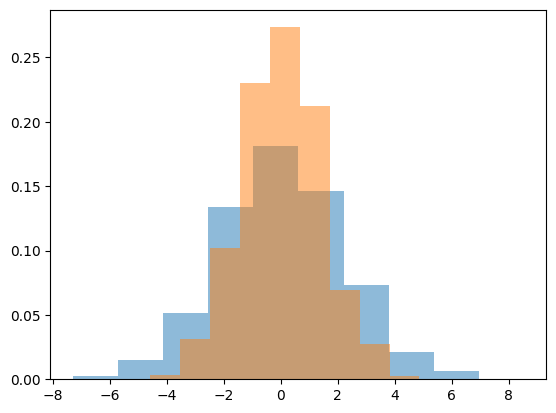

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data = pd.DataFrame(data, columns=['x','y'])
for col in 'xy' :
    plt.hist(data[col], density=True, alpha=0.5)

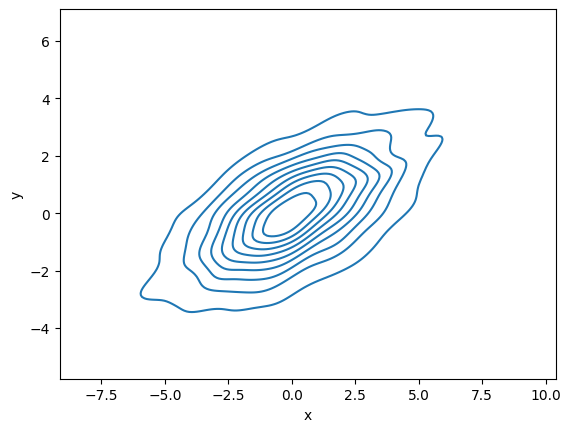

In [41]:
sns.kdeplot(data, x='x', y='y');

In [43]:
df = sns.load_dataset('iris')

In [48]:
df.head(), type(df)

(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 pandas.core.frame.DataFrame)

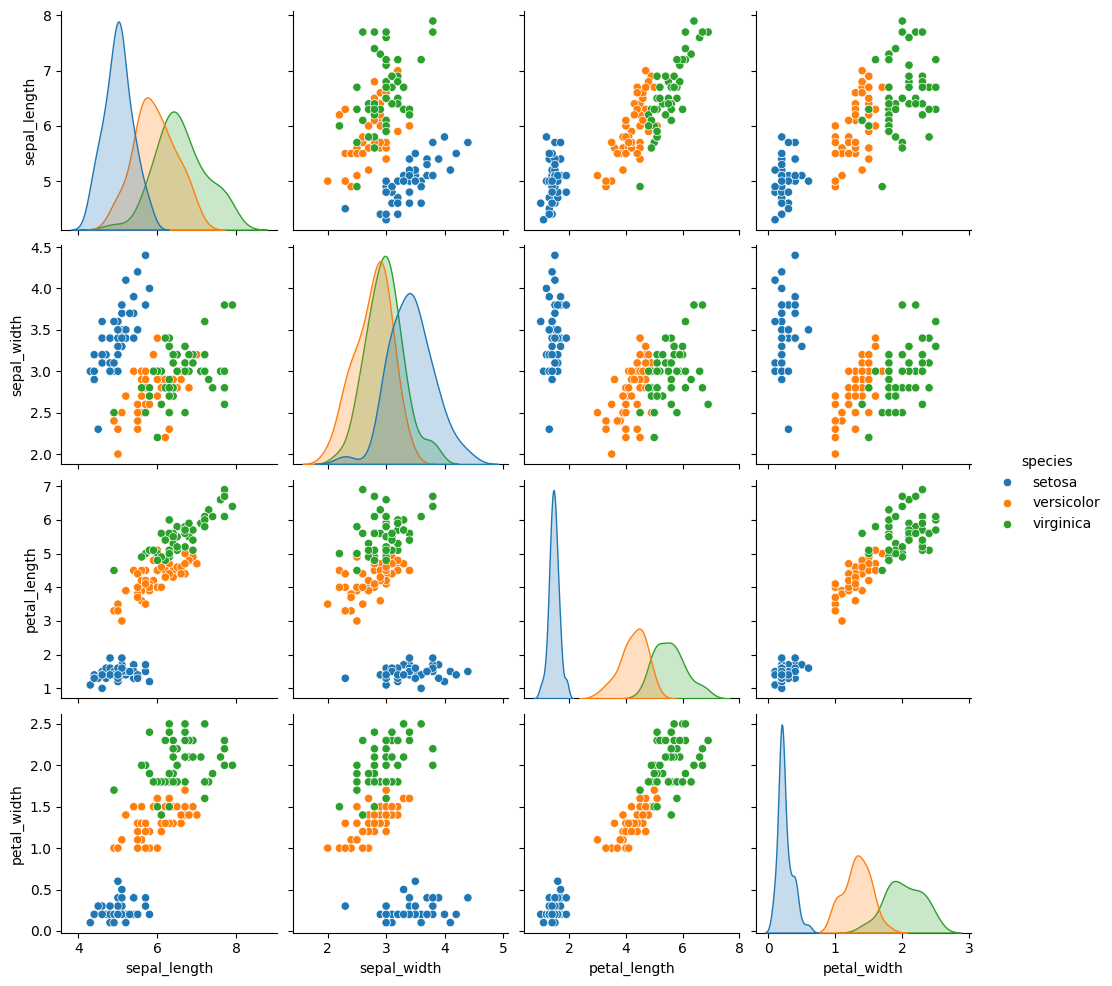

In [55]:
sns.pairplot(df, hue='species')

In [57]:
dt = sns.load_dataset('tips')
dt.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


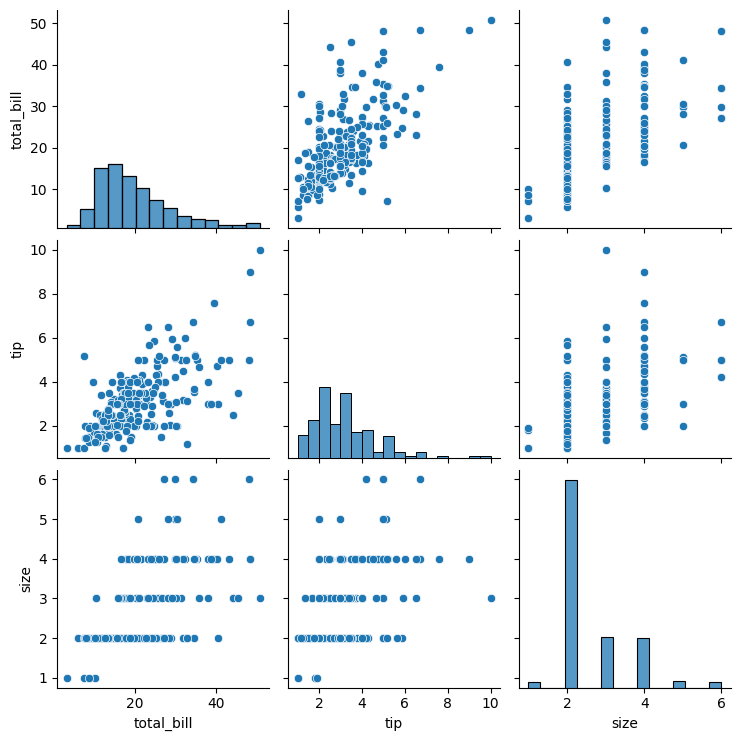

In [65]:
sns.pairplot(dt);

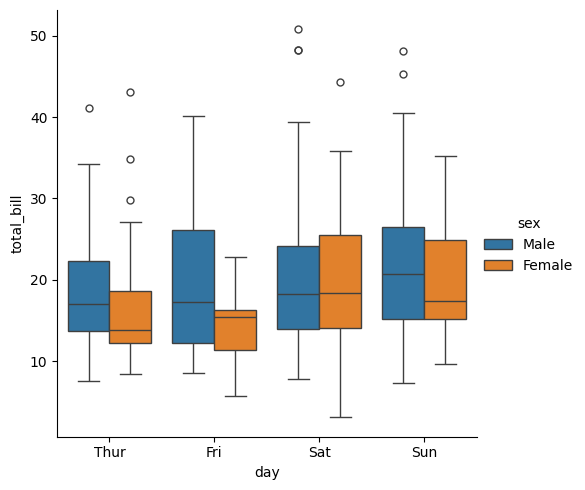

In [73]:
sns.catplot(data=dt, x='day', y='total_bill', hue='sex', kind='box')

In [78]:
md = pd.read_csv("https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv")
md.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [81]:
md.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [88]:
import datetime
def c_t(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

md = pd.read_csv("https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv", converters={'split':c_t, 'final':c_t})
md.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [94]:
md['split_sec'] = md['split'].dt.total_seconds()
md['final_sec'] = md['final'].dt.total_seconds()

In [96]:
md.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


In [104]:
md['frac'] = 1 - 2*(md.split_sec / md.final_sec)

In [108]:
md.head()

,age,gender,split,final,split_sec,final_sec,frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


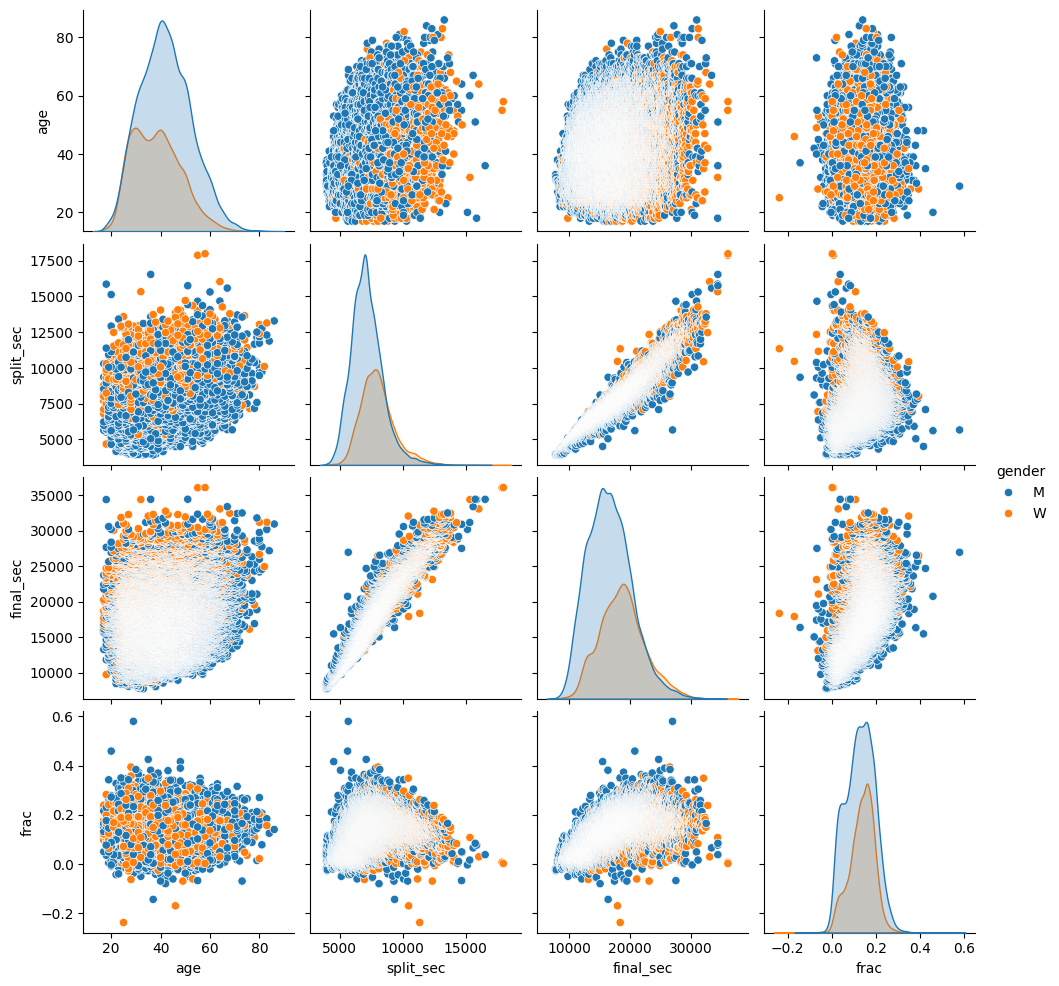

In [122]:
fig = sns.pairplot(md, vars=['age','split_sec','final_sec', 'frac'], hue='gender')

<Axes: xlabel='gender', ylabel='frac'>

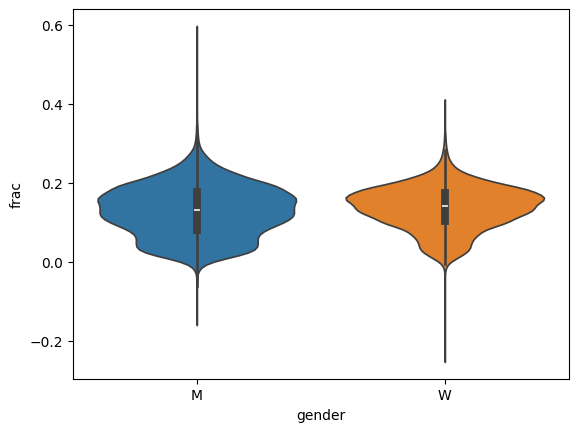

In [127]:
sns.violinplot(md, x='gender', y='frac', hue='gender')

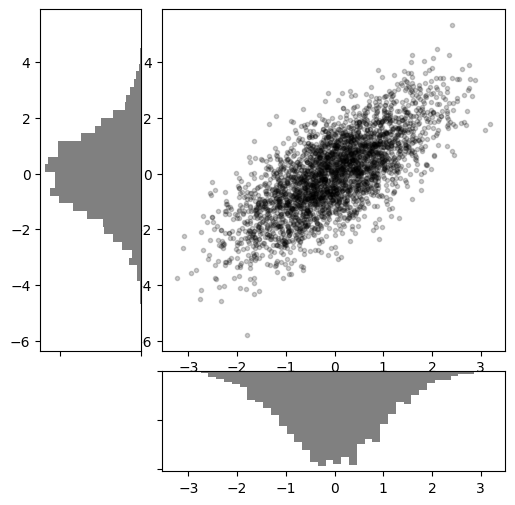

In [151]:
mean = [0,0]
cov = [[1, 1],[1,2]]

x,y = np.random.multivariate_normal(mean,cov,3000).T

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [156]:
import datetime

births = pd.read_csv("data/births.csv")

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.Timestamp(2012, month, day)
                        for (month, day) in births_by_date.index]

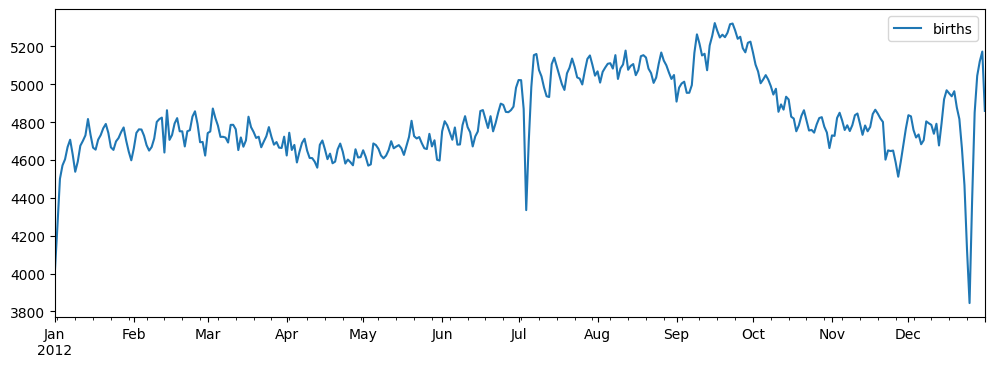

In [158]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

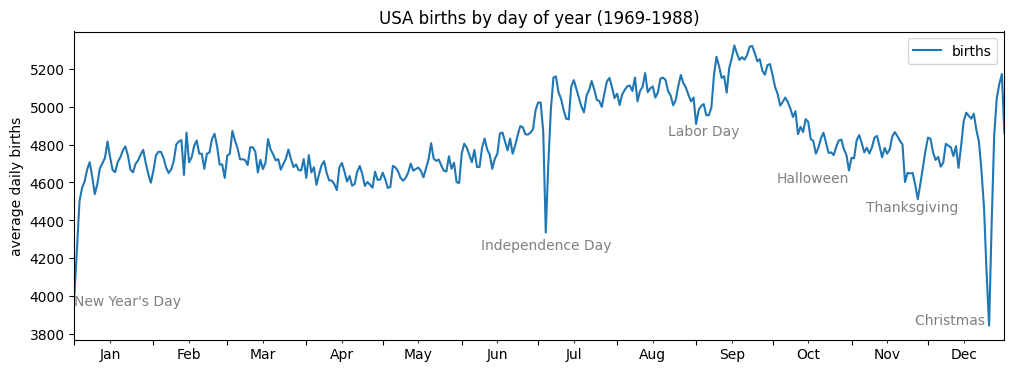

In [161]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

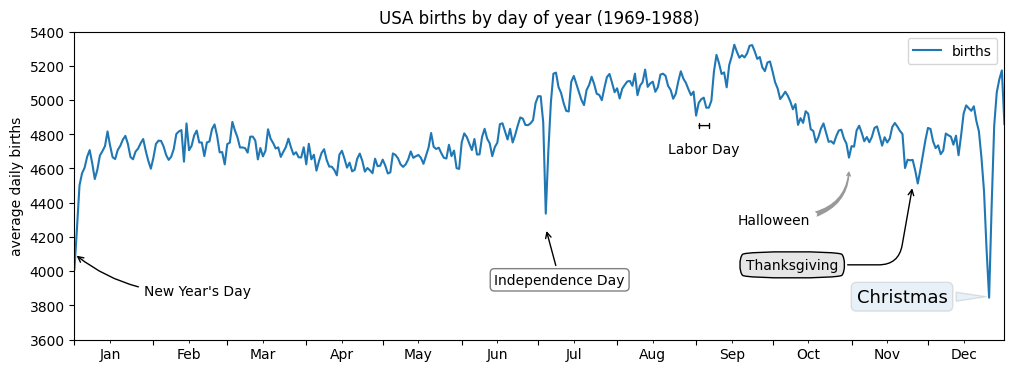

In [163]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

#### plot 눈금 맞춤 변경 (log 스케일)

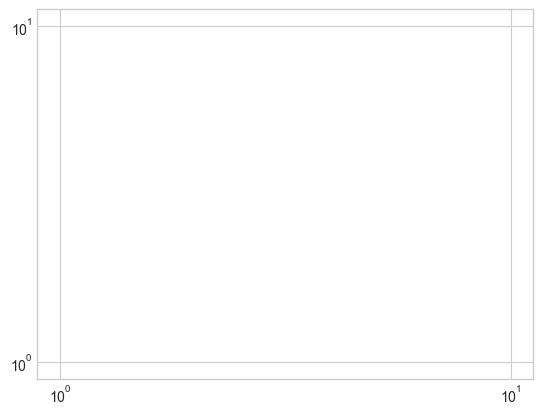

In [176]:
plt.style.use('seaborn-v0_8-whitegrid')
ax = plt.axes(xscale='log', yscale='log')

#### 눈금 또는 레이블 숨기기

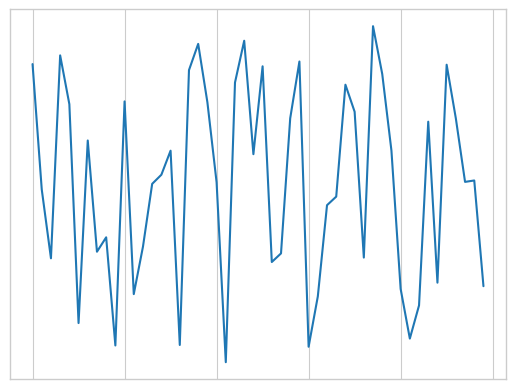

In [178]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

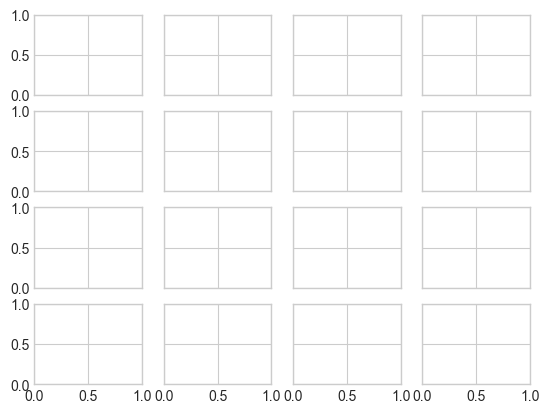

In [180]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

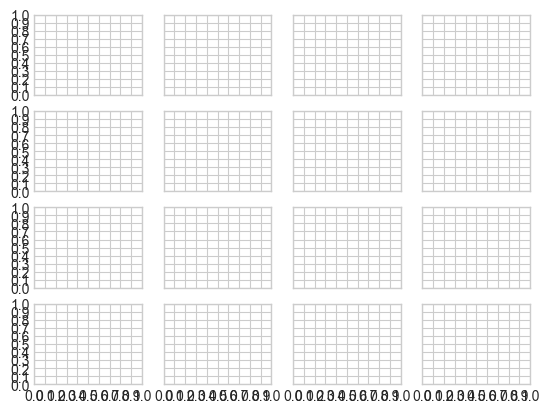

In [183]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator())
    axi.yaxis.set_major_locator(plt.MaxNLocator())
fig

(0.0, 9.42477796076938)

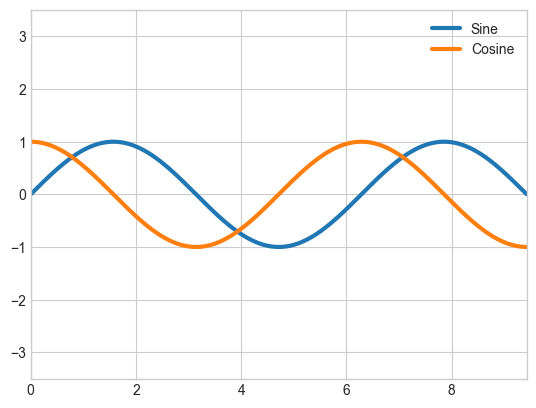

In [185]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

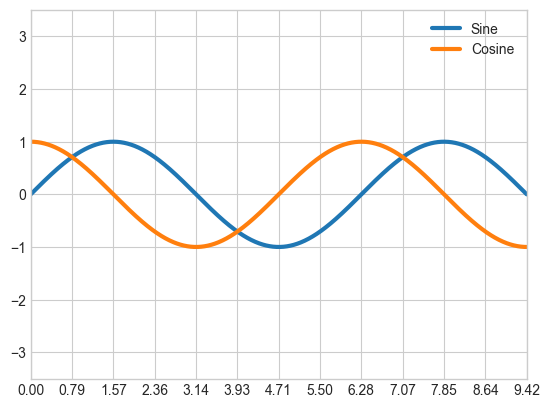

In [187]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
fig

#### 사용자 정의 함수 포맷 지시자 (FuncFormatter)

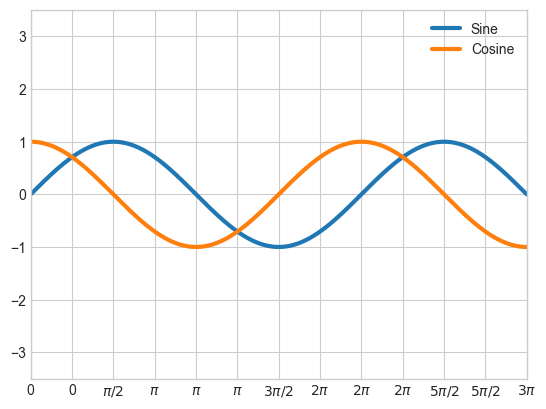

In [189]:
def format_func (value, tick_number) :
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2>0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

#### 한글 폰트 사용

In [16]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\user\.matplotlib


In [22]:
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

mpl.rcParams['font.family'] = 'Microsoft Sans Serif'
print(mpl.rcParams['font.family'])

['NanumGothic']
10.0
['Microsoft Sans Serif']


Text(0.5, 1.0, '한글')

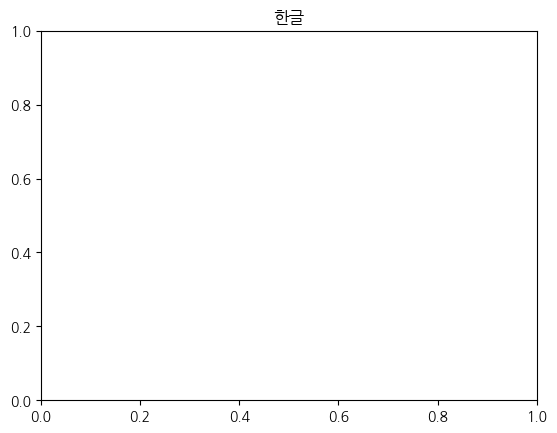

In [18]:
import matplotlib.pyplot as plt
mpl.rcParams
fig, ax = plt.subplots()
ax.set_title('한글')

#### 3D 축 생성

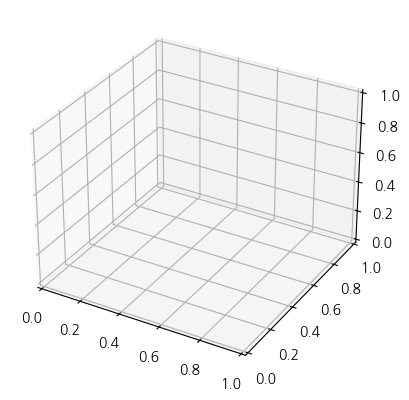

In [19]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

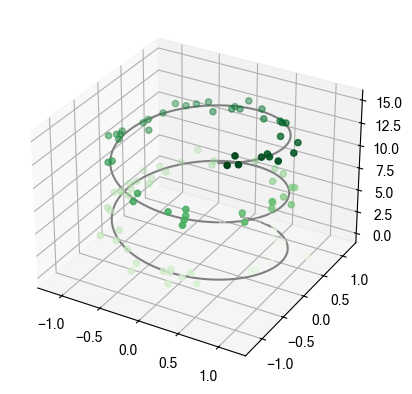

In [29]:
ax = plt.axes(projection='3d')
plt.rc('font', family='Microsoft Sans Serif')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 *np.random.randn(100)
ydata = np.cos(zdata) + 0.1 *np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

In [34]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
x,y,z = get_test_data(0.5)

(<mpl_toolkits.mplot3d.art3d.Line3DCollection at 0x2002badaf10>,
 [<mpl_toolkits.mplot3d.art3d.Line3D at 0x2002baf45b0>])

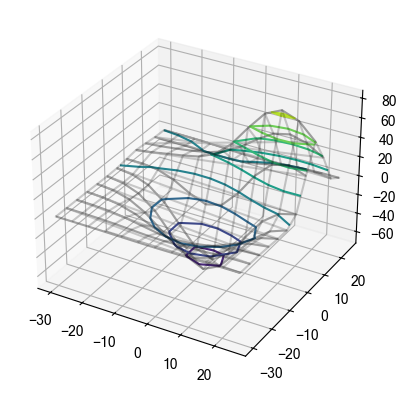

In [54]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_wireframe(x,y,z, color='black', alpha=0.2), ax.contour3D(x,y,z , alpha=1), ax.plot3D(x,y,z, color='gray', alpha=0.4)